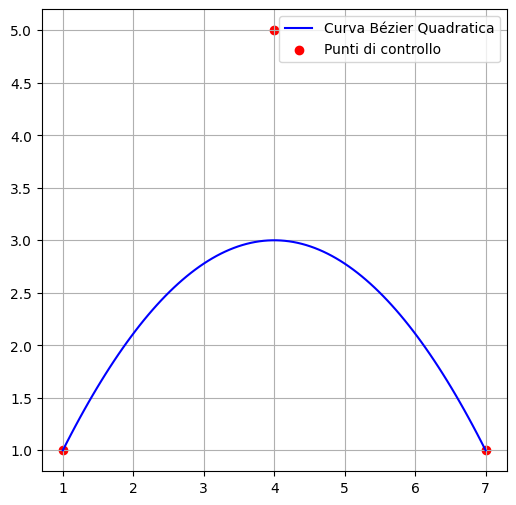

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinate dei punti
p0 = np.array([1, 1])  # Punto iniziale
p1 = np.array([4, 5])  # Punto di controllo
p2 = np.array([7, 1])  # Punto finale

# Funzione per calcolare la curva Bézier quadratica
def bezier_quadratica(t, p0, p1, p2):
    return (1 - t)**2 * p0 + 2 * (1 - t) * t * p1 + t**2 * p2

# Genera i punti della curva
t = np.linspace(0, 1, 100)
curve = np.array([bezier_quadratica(i, p0, p1, p2) for i in t])

# Plot
plt.figure(figsize=(6, 6))
plt.plot(curve[:, 0], curve[:, 1], label="Curva Bézier Quadratica", color="blue")
plt.scatter([p0[0], p1[0], p2[0]], [p0[1], p1[1], p2[1]], color="red", label="Punti di controllo")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import cv2
import numpy as np

# Dimensione dell'immagine
height, width = 600, 800

# Crea un'immagine in scala di grigi
image = cv2.imread("output/369908.png")

# Definizione dei punti
p0 = (0, 300)       # Punto iniziale
p1 = (400, 300)     # Punto di controllo
p2 = (400, 600)     # Punto finale

# Funzione per calcolare i punti della curva Bézier
def bezier_quadratica(t, p0, p1, p2):
    x = int((1 - t)**2 * p0[0] + 2 * (1 - t) * t * p1[0] + t**2 * p2[0])
    y = int((1 - t)**2 * p0[1] + 2 * (1 - t) * t * p1[1] + t**2 * p2[1])
    return (x, y)

# Genera i punti della curva
num_points = 100
curve_points = [bezier_quadratica(t, p0, p1, p2) for t in np.linspace(0, 1, num_points)]

# Disegna la curva di rosso
for i in range(1, len(curve_points)):
    cv2.line(image, curve_points[i - 1], curve_points[i], (0, 0, 255), 1)

# Disegna i punti di controllo in giallo
cv2.circle(image, p0, 5, (0, 255, 255), -1)  # Giallo
cv2.circle(image, p1, 5, (0, 255, 255), -1)  # Giallo
cv2.circle(image, p2, 5, (0, 255, 255), -1)  # Giallo

# Mostra l'immagine
cv2.imshow("Curva Bézier su immagine in scala di grigi", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salva l'immagine su disco
cv2.imwrite("bezier_curve.png", image)

True

In [8]:
import cv2
import numpy as np

# Carica l'immagine esistente
image = cv2.imread("output/369908.png", cv2.IMREAD_GRAYSCALE)

# Verifica se l'immagine è stata caricata correttamente
if image is None:
    raise FileNotFoundError("Immagine '369900.png' non trovata!")

# Applica una soglia per ottenere un'immagine binaria
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Trova i contorni nell'immagine binaria
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Carica una copia a colori dell'immagine per visualizzare i risultati
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Analizza i contorni per trovare possibili ingressi
for contour in contours:
    # Calcola il rettangolo che racchiude il contorno
    x, y, w, h = cv2.boundingRect(contour)

    # Filtra i contorni basati sulla dimensione (ad esempio, larghezza o altezza specifica degli ingressi)
    if w > 50 and h < 20:  # Criterio per identificare ingressi rettangolari
        # Disegna un rettangolo sugli ingressi rilevati
        cv2.rectangle(image_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostra l'immagine con gli ingressi evidenziati
cv2.imshow("Ingressi rilevati", image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
import cv2
import numpy as np

# Carica l'immagine esistente
image = cv2.imread("output/369908.png", cv2.IMREAD_GRAYSCALE)

# Verifica se l'immagine è stata caricata correttamente
if image is None:
    raise FileNotFoundError("Immagine '369900.png' non trovata!")

# Applica una soglia per ottenere un'immagine binaria
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Trova i contorni nell'immagine binaria
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Carica una copia a colori dell'immagine per visualizzare i risultati
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Analizza i contorni per trovare aree con area maggiore di 150
for contour in contours:
    # Calcola l'area del contorno
    area = cv2.contourArea(contour)

    # Filtra i contorni basati sull'area
    if area > 550:  # Criterio per identificare aree significative
        # Disegna il contorno sull'immagine
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)

# Mostra l'immagine con le aree evidenziate
cv2.imshow("Aree con area > 150", image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2
import numpy as np

# Carica l'immagine esistente
image = cv2.imread("output/369908.png", cv2.IMREAD_GRAYSCALE)

# Verifica se l'immagine è stata caricata correttamente
if image is None:
    raise FileNotFoundError("Immagine '369900.png' non trovata!")

# Applica una soglia per ottenere un'immagine binaria
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Trova i contorni nell'immagine binaria
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Carica una copia a colori dell'immagine per visualizzare i risultati
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Lista per memorizzare i centroidi delle aree regolari
centroids = []

# Analizza i contorni per trovare aree con area maggiore di 150
for contour in contours:
    # Calcola l'area del contorno
    area = cv2.contourArea(contour)

    # Filtra i contorni basati sull'area
    if area > 550:  # Criterio per identificare aree significative
        # Disegna il contorno sull'immagine
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)

        # Calcola il centroide del contorno
        moments = cv2.moments(contour)
        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
            centroids.append((cx, cy))
            # Disegna il centroide sull'immagine
            cv2.circle(image_color, (cx, cy), 5, (255, 0, 0), -1)

# Calcola e disegna i punti medi tra i centroidi a due a due
for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
        # Calcola il punto medio
        x_mid = (centroids[i][0] + centroids[j][0]) // 2
        y_mid = (centroids[i][1] + centroids[j][1]) // 2
        # Disegna il punto medio sull'immagine
        cv2.circle(image_color, (x_mid, y_mid), 5, (0, 0, 255), -1)

# Mostra l'immagine con le aree evidenziate e i punti medi
cv2.imshow("Aree con area > 150, centroidi e punti medi", image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salva l'immagine risultante
cv2.imwrite("centroidi_e_punti_medi.png", image_color)


True

In [23]:
import cv2
import numpy as np

# Carica l'immagine esistente
image = cv2.imread("output/369908.png", cv2.IMREAD_GRAYSCALE)

# Verifica se l'immagine è stata caricata correttamente
if image is None:
    raise FileNotFoundError("Immagine '369900.png' non trovata!")

# Applica una soglia per ottenere un'immagine binaria
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Trova i contorni nell'immagine binaria
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Carica una copia a colori dell'immagine per visualizzare i risultati
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Lista per memorizzare i centroidi delle aree regolari
centroids = []

# Analizza i contorni per trovare aree con area maggiore di 150
for contour in contours:
    # Calcola l'area del contorno
    area = cv2.contourArea(contour)

    # Filtra i contorni basati sull'area
    if area > 550:  # Criterio per identificare aree significative
        # Disegna il contorno sull'immagine
        cv2.drawContours(image_color, [contour], -1, (0, 255, 0), 2)

        # Calcola il centroide del contorno
        moments = cv2.moments(contour)
        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
            centroids.append((cx, cy))
            # Disegna il centroide sull'immagine
            cv2.circle(image_color, (cx, cy), 5, (255, 0, 0), -1)

# Filtra i centroidi per includere solo quelli in basso a sinistra
height, width = image.shape
filtered_centroids = [c for c in centroids if c[0] < width // 2 and c[1] > height // 2]

# Calcola e disegna il punto medio tra le due aree in basso a sinistra
if len(filtered_centroids) >= 2:
    for i in range(len(filtered_centroids)):
        for j in range(i + 1, len(filtered_centroids)):
            # Calcola il punto medio
            x_mid = (filtered_centroids[i][0] + filtered_centroids[j][0]) // 2
            y_mid = (filtered_centroids[i][1] + filtered_centroids[j][1]) // 2
            # Disegna il punto medio sull'immagine
            cv2.circle(image_color, (x_mid, y_mid), 5, (0, 0, 255), -1)

# Mostra l'immagine con le aree evidenziate e i punti medi
cv2.imshow("Aree con area > 150, centroidi e punti medi", image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salva l'immagine risultante
cv2.imwrite("centroidi_e_punti_medi.png", image_color)

True

In [22]:
import cv2
import numpy as np

# Carica l'immagine esistente
image = cv2.imread("output/369908.png", cv2.IMREAD_GRAYSCALE)

# Verifica se l'immagine è stata caricata correttamente
if image is None:
    raise FileNotFoundError("Immagine '369900.png' non trovata!")

# Applica una soglia per ottenere un'immagine binaria
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=200, minLineLength=70, maxLineGap=5)

# Carica una copia a colori dell'immagine per visualizzare i risultati
image_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Disegna le linee trovate che soddisfano il criterio di lunghezza
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Calcola la lunghezza della linea
        length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        if length > 100:  # Filtra le linee con lunghezza maggiore di 100
            cv2.line(image_color, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Mostra l'immagine con le linee evidenziate
cv2.imshow("Linee maggiori di 100 pixel", image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salva l'immagine risultante
cv2.imwrite("linee_maggiori_di_100.png", image_color)


True

In [10]:
import cv2
import numpy as np

# Carica l'immagine esistente
image = cv2.imread("output/369977.png", cv2.IMREAD_GRAYSCALE)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

def spline_cubica(p0, t0, p1, t1, num_points=100):
    """
    Calcola una spline cubica tra due punti con tangenti specificate.
    
    :param p0: Punto iniziale (x0, y0)
    :param t0: Tangente al punto iniziale (tx0, ty0)
    :param p1: Punto finale (x1, y1)
    :param t1: Tangente al punto finale (tx1, ty1)
    :param num_points: Numero di punti per disegnare la curva
    :return: Lista di punti della spline cubica
    """
    t = np.linspace(0, 1, num_points)
    h00 = 2 * t**3 - 3 * t**2 + 1
    h10 = t**3 - 2 * t**2 + t
    h01 = -2 * t**3 + 3 * t**2
    h11 = t**3 - t**2

    spline_x = h00 * p0[0] + h10 * t0[0] + h01 * p1[0] + h11 * t1[0]
    spline_y = h00 * p0[1] + h10 * t0[1] + h01 * p1[1] + h11 * t1[1]

    return np.array(list(zip(spline_x, spline_y)), dtype=np.int32)

# Esempio: Definizione di punti e tangenti
p0 = (50, 300)  # Punto iniziale
p1 = (250, 100)  # Punto finale
t0 = (150, -100)  # Tangente al punto iniziale
t1 = (50, 150)  # Tangente al punto finale

# Disegna le tangenti
cv2.line(image_color, p0, (p0[0] + t0[0], p0[1] + t0[1]), (255, 0, 0), 2)
cv2.line(image_color, p1, (p1[0] + t1[0], p1[1] + t1[1]), (255, 0, 0), 2)

# Calcola la spline cubica
curve_points = spline_cubica(p0, t0, p1, t1)

# Disegna la spline sull'immagine
for i in range(len(curve_points) - 1):
    cv2.line(image_color, tuple(curve_points[i]), tuple(curve_points[i + 1]), (0, 0, 255), 2)

# Mostra l'immagine con la curva
cv2.imshow("Spline Cubica", image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Salva l'immagine risultante
cv2.imwrite("spline_cubica.png", image_color)


True